# Master NB

#### Dependencies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import eli5

import sys
sys.path.append('../src')

%load_ext autoreload
%autoreload 1

from models.EDA import create_ydf
%aimport models.EDA
from models.models import evaluate_model
from models.plot import plot_confusion_matrix, plot_LSA, plot_correct_per_publisher
%aimport models.plot

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load data

In [2]:
DATA_PATH = '../data/'
DATA_INTERIM_PATH = DATA_PATH + 'interim/'
cols = ['preprocessed_text', 'hyperpartisan', 'domain', 'HP_links_count', 'nonHP_links_count']
train = pd.read_csv(DATA_INTERIM_PATH + 'train_p.csv', usecols=cols)
val = pd.read_csv(DATA_INTERIM_PATH + 'val_p.csv', usecols=cols)

#### BASELINE: TF-IDF, Logistic Regression with no hyperparameter tuning

In [4]:
vec = TfidfVectorizer()
X_train_tfidf = vec.fit_transform(train['preprocessed_text'])
X_test_tfidf = vec.transform(val['preprocessed_text'])
y_train = train['hyperpartisan'].tolist()
y_test = val['hyperpartisan'].tolist()

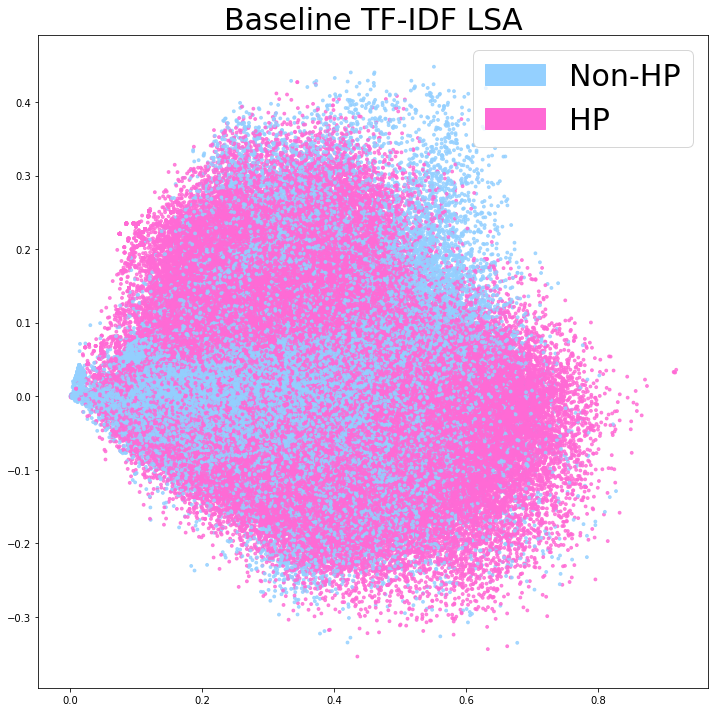

In [19]:
_ = plot_LSA(X_train_tfidf, y_train, title='Baseline TF-IDF LSA')

In [15]:
lr = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=1)
lr.fit(X_train_tfidf, y_train)
predicted = lr.predict(X_test_tfidf)
evaluate_model(y_test, predicted);

              precision    recall  f1-score   support

       False       0.68      0.38      0.49     75000
        True       0.57      0.82      0.67     75000

   micro avg       0.60      0.60      0.60    150000
   macro avg       0.63      0.60      0.58    150000
weighted avg       0.63      0.60      0.58    150000

Accuracy: 0.6011


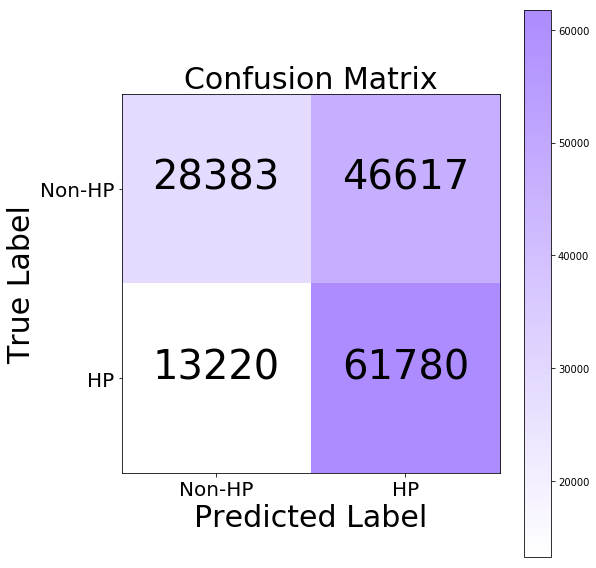

In [20]:
plot_confusion_matrix(y_test, predicted)

In [21]:
ydf = create_ydf(val, predicted)

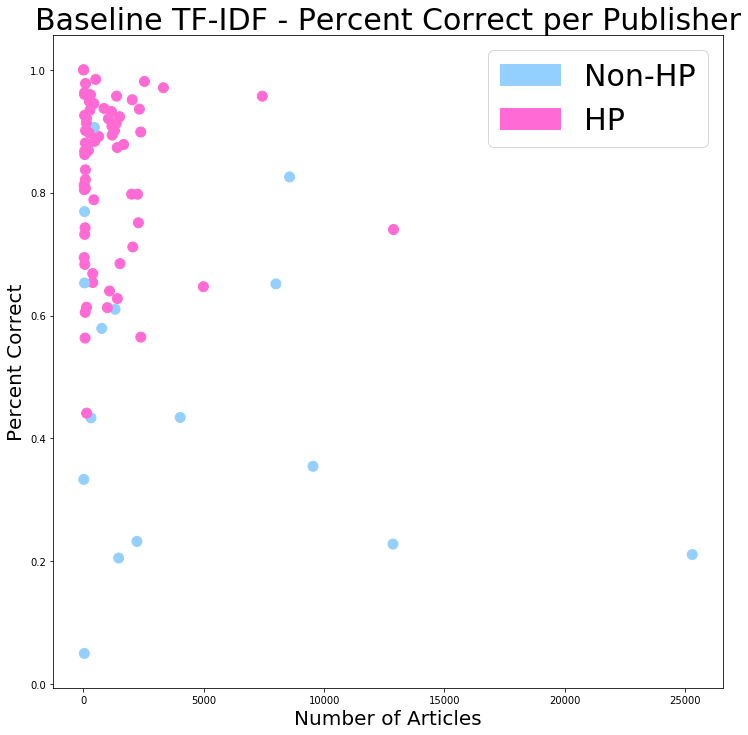

In [27]:
%matplotlib inline
#%matplotlib tk
import matplotlib.pyplot as plt
plot_correct_per_publisher(ydf, "Baseline TF-IDF - Percent Correct per Publisher")

In [29]:
eli5.explain_weights(lr, vec=vec)

Weight?,Feature
+18.318,marketwatch
+14.573,ka
+12.173,motley
+12.139,fool
+11.884,cital
+11.596,weons
+10.874,wire
+10.560,mr
+10.533,ht
+10.461,peared


#### Tune TF-IDF Parameters:

In [30]:
vec_tuned = TfidfVectorizer(min_df=2, max_df=0.9, ngram_range=(1,2))
X_train_tfidf_tuned = vec_tuned.fit_transform(train['preprocessed_text'])
X_test_tfidf_tuned = vec_tuned.transform(val['preprocessed_text'])

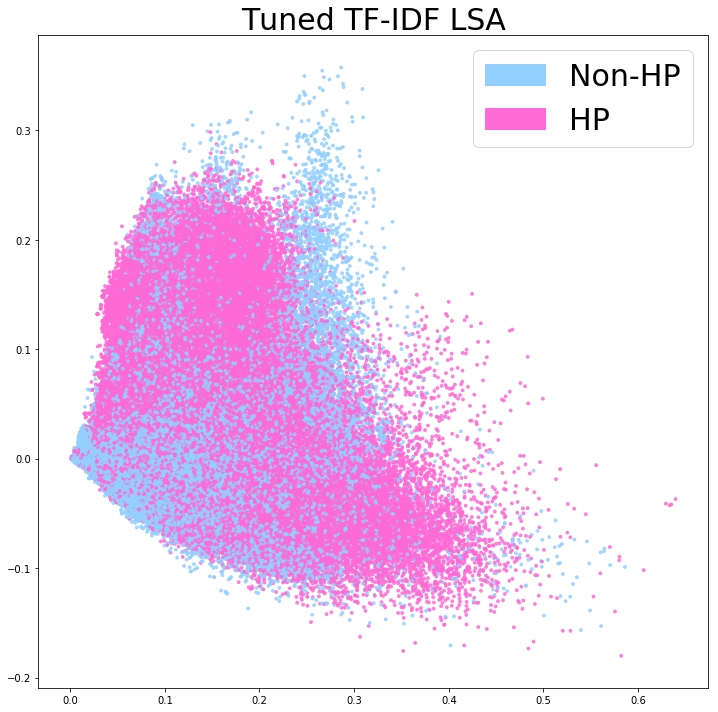

In [35]:
_ = plot_LSA(X_train_tfidf_tuned, y_train, title='Tuned TF-IDF LSA')

In [36]:
lr = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=1)
lr.fit(X_train_tfidf_tuned, y_train)
predicted = lr.predict(X_test_tfidf_tuned)
evaluate_model(y_test, predicted);

              precision    recall  f1-score   support

       False       0.69      0.36      0.47     75000
        True       0.57      0.84      0.68     75000

   micro avg       0.60      0.60      0.60    150000
   macro avg       0.63      0.60      0.58    150000
weighted avg       0.63      0.60      0.58    150000

Accuracy: 0.6002


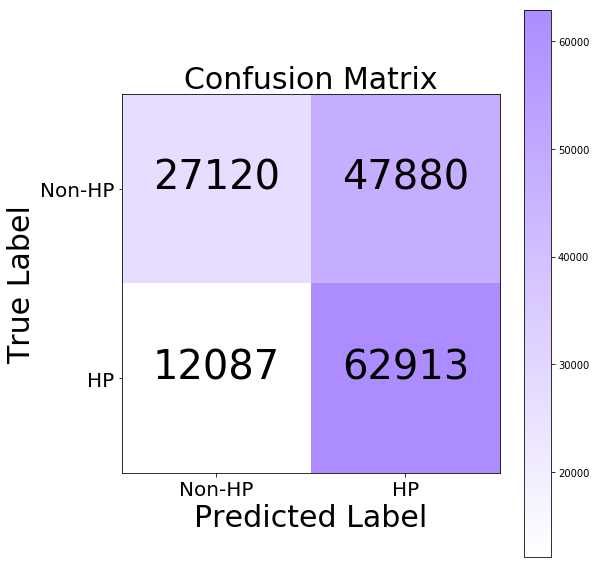

In [37]:
plot_confusion_matrix(y_test, predicted)

In [38]:
ydf = create_ydf(val, predicted)

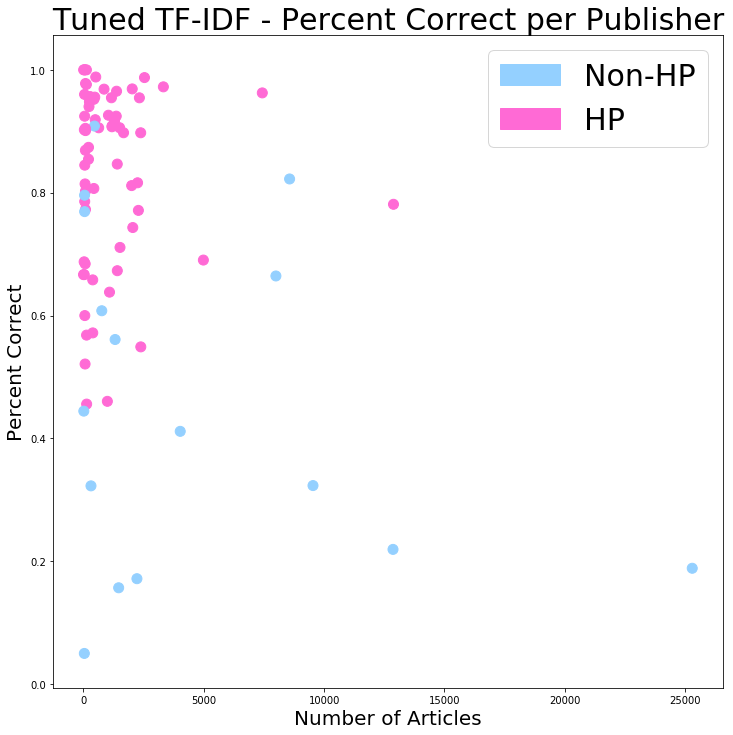

In [39]:
%matplotlib inline
#%matplotlib tk
import matplotlib.pyplot as plt
plot_correct_per_publisher(ydf, "Tuned TF-IDF - Percent Correct per Publisher")

In [40]:
eli5.explain_weights(lr, vec=vec_tuned)

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,\n          penalty='l2', random_state=1, solver='lbfgs', tol=0.0001,\n          verbose=0, warm_start=False)", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=True, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='write to', weight=15.199413883163317, std=None, value=None), FeatureWeight(feature='marketwatch inc', weight=13.685902779885007, std=None, value=None), FeatureWeight(feature='fox business', weight=13.585767314775275, std=None, value=None), FeatureWeight(feature='posted by', weight=13.509339048401616, std=None, value=None), FeatureWeight(feature='ka', weight=12.02506741621292, std=None, value=None), FeatureWeight(feature='marketwatch', weight=11.584270434562715, std=None, value=None), FeatureWeight(feature='mr', weight=10.892523107553458, std=None, value=None)], neg=[FeatureWeight(feature='goverent', weight=-44.08984079340944, std=None, value=None), FeatureWeight(feature='globalpost', weight=-28.23928324474317, std=None, value=None), FeatureWeight(feature='from globalpost', weight=-18.302737066661454, std=None, value=None), FeatureWeight(feature='published time', weight=-17.354617681664827, std=None, value=None), FeatureWeight(feature='said', weight=-17.20588900956407, std=None, value=None), FeatureWeight(feature='more from', weight=-13.28717242142502, std=None, value=None), FeatureWeight(feature='the goverent', weight=-12.922476760341848, std=None, value=None), FeatureWeight(feature='baptist', weight=-12.835863856620511, std=None, value=None), FeatureWeight(feature='enviroental', weight=-12.297700919013531, std=None, value=None), FeatureWeight(feature='goverents', weight=-11.665967811872965, std=None, value=None), FeatureWeight(feature='information from', weight=-11.200393561364244, std=None, value=None), FeatureWeight(feature='enviroent', weight=-11.038023865864897, std=None, value=None), FeatureWeight(feature='file photo', weight=-10.94057738715781, std=None, value=None)], pos_remaining=5903553, neg_remaining=5618663), proba=None, score=None, weighted_spans=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None)

#### Custom Featurs - Linked Domains